In [1]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import cftime
from datetime import datetime
from src.Enumerations import Season, Experiments
import matplotlib.pyplot as plt


/work/aa0238/a271093/Conda/MOAAP_env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:

exp_control_CNRM=Experiments.ICON_CNRM_CONTROL.value
exp_ssp_CNRM=Experiments.ICON_CNRM_SSP.value
exp_control_Nor=Experiments.ICON_NORESM_CONTROL.value
exp_ssp_Nor=Experiments.ICON_NORESM_SSP.value
exp_ERA5=Experiments.ERA5.value


BMU_control_CNRM = pd.read_csv(f"{exp_control_CNRM.BMU_path}{exp_control_CNRM.BMU_file}")
BMU_ssp_CNRM = pd.read_csv(f"{exp_ssp_CNRM.BMU_path}{exp_ssp_CNRM.BMU_file}")
BMU_control_Nor = pd.read_csv(f"{exp_control_Nor.BMU_path}{exp_control_Nor.BMU_file}")
BMU_ssp_Nor = pd.read_csv(f"{exp_ssp_Nor.BMU_path}{exp_ssp_Nor.BMU_file}")
BMU_ERA5 = pd.read_csv(f"{exp_ERA5.BMU_path}{exp_ERA5.BMU_file}")

In [4]:
def add_datetime_col(BMU):
    date_strings =list( BMU.time.values)

    datetimes = [datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S") for date_str in date_strings]
    BMU['datetimes'] = datetimes

    return BMU

def add_cftime_col(BMU):
    date_strings =list( BMU.time.values)

    # Konvertiere die Datums-Strings in cftime.DatetimeNoLeap Objekte
    cftime_dates = [cftime.DatetimeNoLeap(datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S').year,
                                      datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S').month,
                                      datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S').day,
                                      datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S').hour,
                                      datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S').minute,
                                      datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S').second)
               for date_string in date_strings]


    BMU['cftimes'] = cftime_dates
    return BMU

In [5]:
BMU_control_CNRM = add_datetime_col(BMU_control_CNRM)
BMU_control_CNRM = add_cftime_col(BMU_control_CNRM)

BMU_ssp_CNRM = add_datetime_col(BMU_ssp_CNRM)
BMU_ssp_CNRM = add_cftime_col(BMU_ssp_CNRM)

BMU_control_Nor = add_datetime_col(BMU_control_Nor)
BMU_control_Nor = add_cftime_col(BMU_control_Nor)

BMU_ssp_Nor = add_datetime_col(BMU_ssp_Nor)
BMU_ssp_Nor = add_cftime_col(BMU_ssp_Nor)

BMU_ERA5 = add_datetime_col(BMU_ERA5)
BMU_ERA5 = add_cftime_col(BMU_ERA5)

In [158]:
ref_freq = BMU['cluster_name'].value_counts(normalize=True)
ref_freq

cluster_name
ATL-    0.292894
NAO-    0.264083
NAO+    0.256718
SCAN    0.186305
Name: proportion, dtype: float64

In [ ]:
freq_ssp=BMU_ssp['cluster_name'].groupby(by = BMU_ssp.datetimes.dt.year).value_counts(normalize=True).to_frame().reorder_levels(order=['cluster_name','datetimes']).reset_index()
freq_control=BMU_control['cluster_name'].groupby(by = BMU_control.datetimes.dt.year).value_counts(normalize=True).to_frame().reorder_levels(order=['cluster_name','datetimes']).reset_index()
freq_ERA5=BMU_ERA5['cluster_name'].groupby(by = BMU_ERA5.datetimes.dt.year).value_counts(normalize=True).to_frame().reorder_levels(order=['cluster_name','datetimes']).reset_index()

In [170]:
freq_ssp.apply(lambda row: row[row["cluster"]-ref_freq)
freq_ssp['freq_anomalies']

,cluster_name,datetimes,proportion
0,NAO+,2015,0.422222
1,NAO-,2015,0.366667
2,ATL-,2015,0.177778
3,SCAN,2015,0.033333
4,NAO-,2016,0.444444
...,...,...,...
334,NAO-,2099,0.144444
335,ATL-,2100,0.377778
336,NAO-,2100,0.266667
337,NAO+,2100,0.255556


In [171]:
ref_freq['NAO+']

0.25671834625323

/tmp/ipykernel_3369639/3872665466.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_dat['10y_rm_frequencies'] = plot_dat['proportion'].rolling(window=30, center=True).mean()
/tmp/ipykernel_3369639/3872665466.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_dat['10y_rm_frequencies'] = plot_dat['proportion'].rolling(window=30, center=True).mean()
/tmp/ipykernel_3369639/3872665466.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

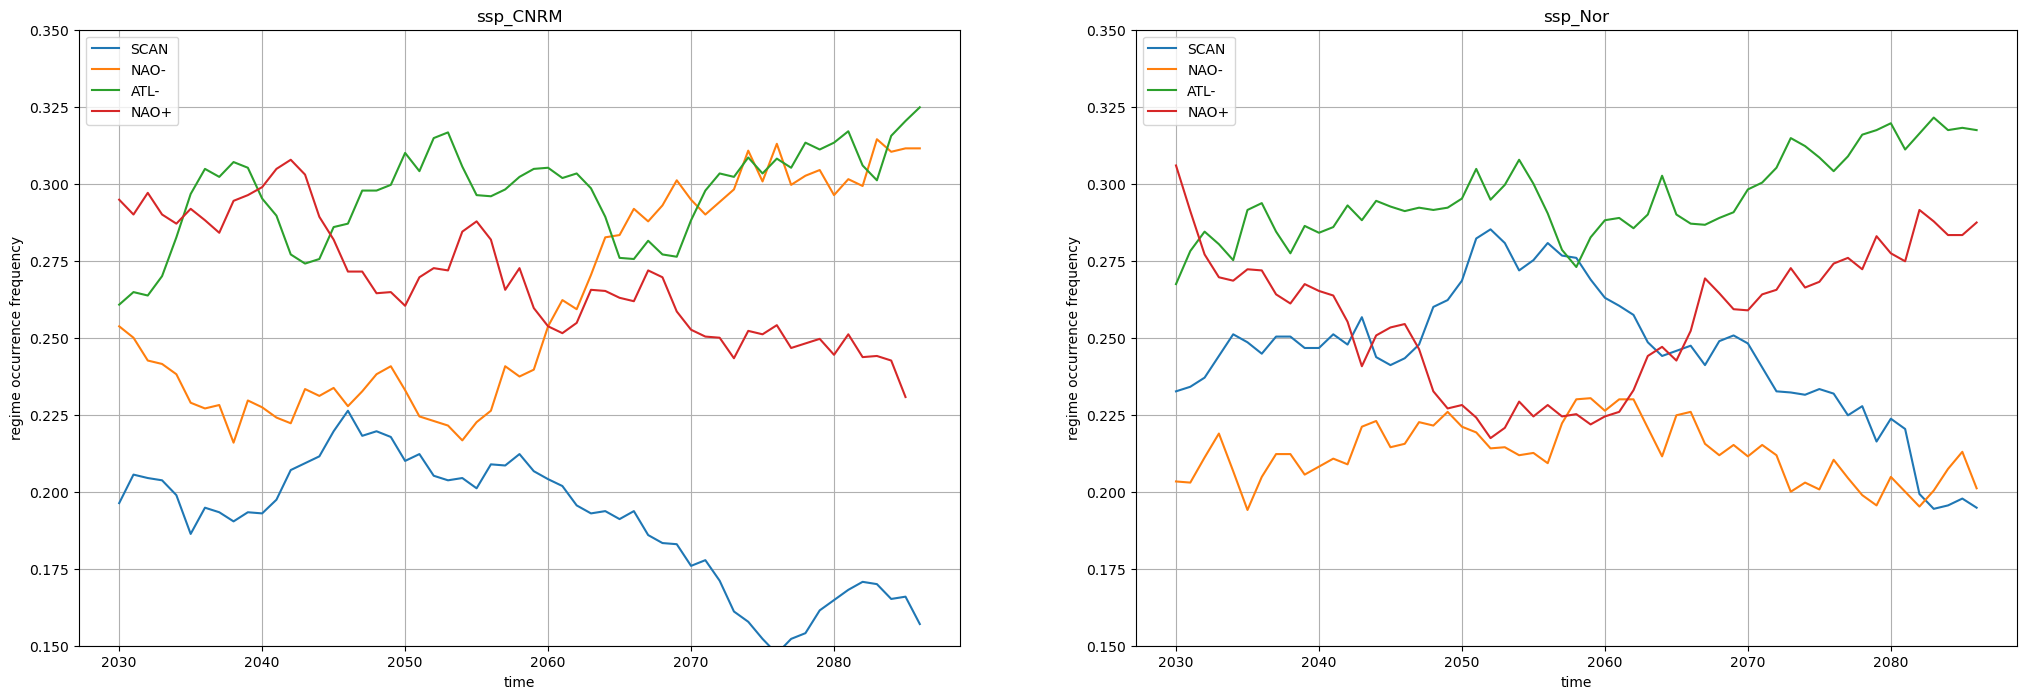

In [23]:
fig = plt.figure(figsize=(25,8))
i=1
for   frame, title in zip([BMU_ssp_CNRM, BMU_ssp_Nor],["ssp_CNRM","ssp_Nor"]):
    ax = fig.add_subplot(1, 2, i )

    for cluster in BMU_control_CNRM["cluster_name"].unique():

        freq=frame['cluster_name'].groupby(by = frame.datetimes.dt.year).value_counts(normalize=True).to_frame().reorder_levels(order=['cluster_name','datetimes']).reset_index()
    
        plot_dat = freq[freq['cluster_name'] == cluster]
        plot_dat['10y_rm_frequencies'] = plot_dat['proportion'].rolling(window=30, center=True).mean()

        plt.plot(plot_dat['datetimes'], plot_dat['10y_rm_frequencies'],label=cluster)
        plt.title(title)
        plt.xlabel("time")
        plt.ylabel("regime occurrence frequency")
        plt.ylim((0.15,0.35))
    i+=1
    plt.grid()
    plt.legend()

In [167]:
for cluster in freq_ssp["cluster_name"].unique():
    
        plot_dat = freq[freq['cluster_name'] == cluster]
        plot_dat['10y_rm_frequencies'] = plot_dat['proportion'].rolling(window=20, center=True).mean()

        plt.plot(plot_dat['datetimes'], plot_dat['10y_rm_frequencies'],label=cluster)
        plt.title(title)
    plt.legend()

NameError: name 'namestr' is not defined

/tmp/ipykernel_3369639/3046296901.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_dat['10y_rm_frequencies'] = plot_dat['proportion'].rolling(window=20, center=True).mean()
/tmp/ipykernel_3369639/3046296901.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_dat['10y_rm_frequencies'] = plot_dat['proportion'].rolling(window=20, center=True).mean()
/tmp/ipykernel_3369639/3046296901.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

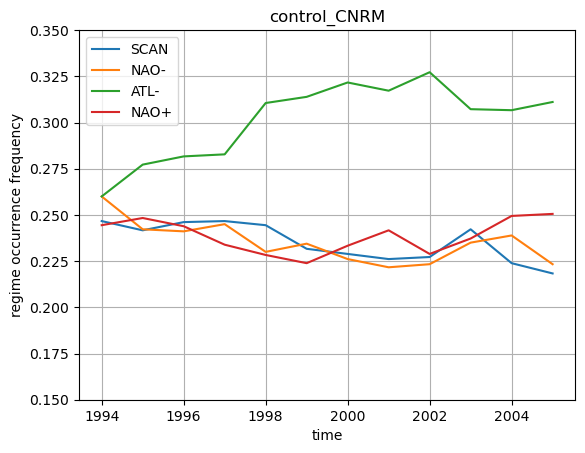

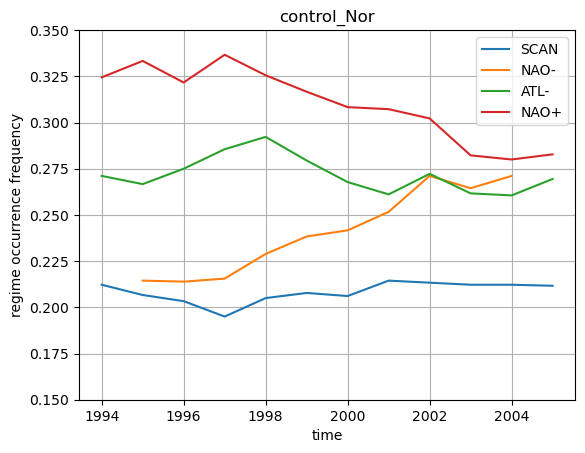

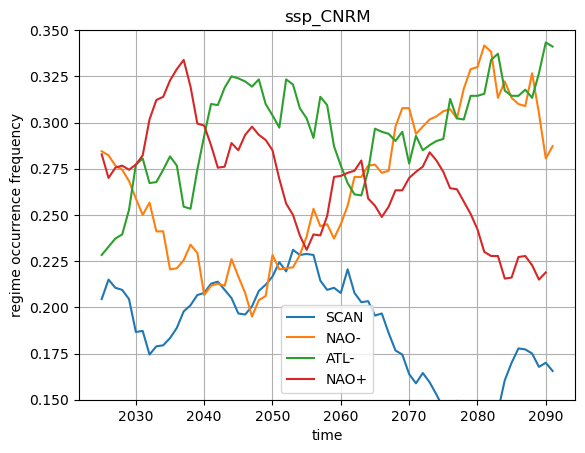

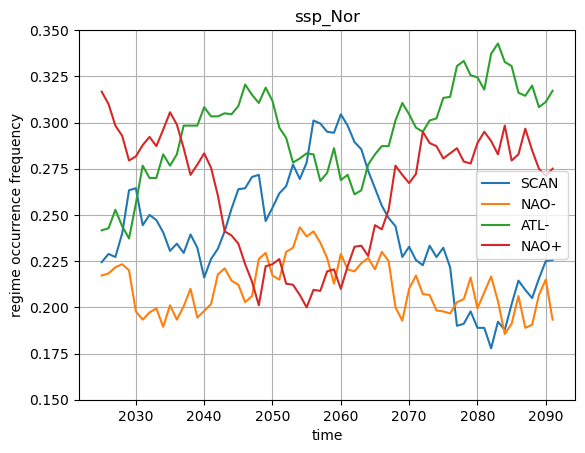

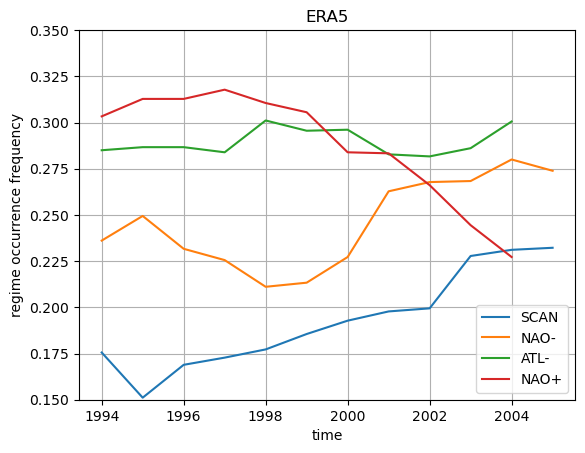

In [24]:
for  frame, title in zip([BMU_control_CNRM, BMU_control_Nor, BMU_ssp_CNRM, BMU_ssp_Nor ,BMU_ERA5],["control_CNRM","control_Nor","ssp_CNRM","ssp_Nor","ERA5"]):
    fig = plt.figure()

    for cluster in BMU_control_CNRM["cluster_name"].unique():

        freq=frame['cluster_name'].groupby(by = frame.datetimes.dt.year).value_counts(normalize=True).to_frame().reorder_levels(order=['cluster_name','datetimes']).reset_index()
    
        plot_dat = freq[freq['cluster_name'] == cluster]
        plot_dat['10y_rm_frequencies'] = plot_dat['proportion'].rolling(window=20, center=True).mean()

        plt.plot(plot_dat['datetimes'], plot_dat['10y_rm_frequencies'],label=cluster)
        plt.title(title)
        plt.xlabel("time")
        plt.ylabel("regime occurrence frequency")
        plt.ylim((0.15,0.35))
    plt.grid()
    plt.legend()

/tmp/ipykernel_2199968/905729154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_dat['10y_rm_frequencies'] = plot_dat['proportion'].rolling(window=15, center=True).mean()
/tmp/ipykernel_2199968/905729154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_dat['10y_rm_frequencies'] = plot_dat['proportion'].rolling(window=15, center=True).mean()
/tmp/ipykernel_2199968/905729154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

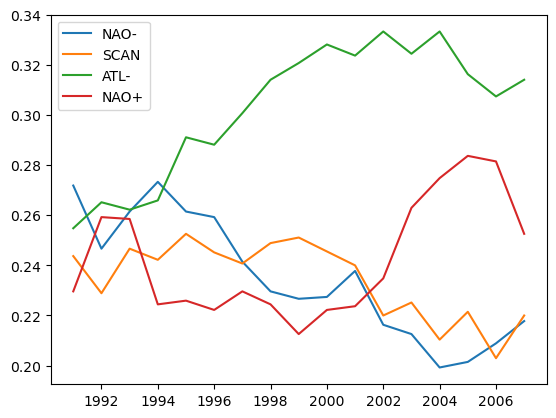

In [150]:
for cluster in b["cluster_name"].unique():
    plot_dat = b[b['cluster_name'] == cluster]
    plot_dat['10y_rm_frequencies'] = plot_dat['proportion'].rolling(window=15, center=True).mean()

    plt.plot(plot_dat['datetimes'], plot_dat['10y_rm_frequencies'],label=cluster)
plt.legend()

In [119]:
plot_dat['proportion'].rolling(window=10, center=True).mean()

3           NaN
5           NaN
11          NaN
12          NaN
16          NaN
         ...   
322    0.206667
326         NaN
330         NaN
333         NaN
338         NaN
Name: proportion, Length: 85, dtype: float64